In [ ]:
%load_ext autoreload
%autoreload 2
import pickle
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils.data import *

In [ ]:
key = 0
path = f'./data/single_key/{key}/'
dfs = get_dfs_from_midi(path, min_notes=30, min_gap=0.)

In [ ]:
gap_dur_dpitch_dfs = gap_duration_deltapitch_transform(dfs)

In [ ]:
dataset = GapDurationDeltaPitchDataset(gap_dur_dpitch_dfs, 30)
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)
len(dataset), len(dataloader)

(41394, 1294)

In [ ]:
for x in dataloader:
    print(x.shape)
    y = batch_rectilinear_with_gap_transform(x)
    print(y.shape)
    break

torch.Size([32, 30, 3])
torch.Size([32, 60])
torch.Size([32, 60, 2])


In [ ]:
gap_dur_dpitch_dfs[0]['Duration'].values

array([0.483871  , 0.483871  , 0.36290325, 0.36290325, 0.967742  ,
       0.2419355 , 0.36290325, 0.36290325, 0.483871  , 1.6935485 ,
       0.483871  , 0.483871  , 0.2419355 , 0.12096775, 0.36290325,
       0.483871  , 0.7258065 , 0.967742  , 0.967742  , 0.483871  ,
       0.483871  , 0.36290325, 0.36290325, 0.7258065 , 0.2419355 ,
       0.2419355 , 0.12096775, 0.12096775, 0.483871  , 0.36290325,
       0.36290325, 0.36290325, 0.36290325, 0.2419355 , 0.36290325,
       0.36290325, 1.2096775 , 0.36290325, 0.36290325, 0.2419355 ,
       0.483871  , 1.451613  , 0.967742  , 0.36290325, 0.36290325,
       2.1774195 , 0.967742  , 0.12096775, 0.12096775, 0.483871  ,
       0.483871  , 1.6935485 , 0.2419355 , 0.12096775, 0.12096775,
       0.7258065 , 0.7258065 , 0.7258065 , 0.7258065 , 0.483871  ])

In [ ]:
dfs[0]['End'].values

array([ 0.483871  ,  0.967742  ,  1.33064525,  1.6935485 ,  2.6612905 ,
        2.903226  ,  3.26612925,  3.6290325 ,  4.1129035 ,  5.806452  ,
        6.290323  ,  6.774194  ,  7.0161295 ,  7.13709725,  7.5000005 ,
        7.9838715 ,  8.709678  ,  9.67742   , 10.645162  , 11.129033  ,
       11.612904  , 11.97580725, 12.3387105 , 13.3064525 , 13.548388  ,
       13.7903235 , 13.91129125, 14.032259  , 14.51613   , 14.87903325,
       15.2419365 , 15.84677525, 16.2096785 , 16.451614  , 16.81451725,
       17.1774205 , 18.387098  , 18.75000125, 19.1129045 , 19.35484   ,
       19.838711  , 21.290324  , 22.258066  , 22.62096925, 22.9838725 ,
       25.161292  , 26.129034  , 26.73387275, 26.8548405 , 27.580647  ,
       28.064518  , 30.000002  , 30.483873  , 30.60484075, 30.7258085 ,
       31.6935505 , 32.419357  , 33.1451635 , 33.87097   , 34.354841  ])

In [ ]:
end = gap_dur_dpitch_dfs[0]['Duration'].cumsum().values + gap_dur_dpitch_dfs[0]['Gap'].cumsum().values
end

array([ 0.483871  ,  0.967742  ,  1.33064525,  1.6935485 ,  2.6612905 ,
        2.903226  ,  3.26612925,  3.6290325 ,  4.1129035 ,  5.806452  ,
        6.290323  ,  6.774194  ,  7.0161295 ,  7.13709725,  7.5000005 ,
        7.9838715 ,  8.709678  ,  9.67742   , 10.645162  , 11.129033  ,
       11.612904  , 11.97580725, 12.3387105 , 13.3064525 , 13.548388  ,
       13.7903235 , 13.91129125, 14.032259  , 14.51613   , 14.87903325,
       15.2419365 , 15.84677525, 16.2096785 , 16.451614  , 16.81451725,
       17.1774205 , 18.387098  , 18.75000125, 19.1129045 , 19.35484   ,
       19.838711  , 21.290324  , 22.258066  , 22.62096925, 22.9838725 ,
       25.161292  , 26.129034  , 26.73387275, 26.8548405 , 27.580647  ,
       28.064518  , 30.000002  , 30.483873  , 30.60484075, 30.7258085 ,
       31.6935505 , 32.419357  , 33.1451635 , 33.87097   , 34.354841  ])

In [ ]:
dfs[0]['End'].values - end

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.55271368e-15,
       0.00000000e+00, 3.55271368e-15, 3.55271368e-15, 3.55271368e-15,
       3.55271368e-15, 3.55271368e-15, 0.00000000e+00, 0.00000000e+00,
       3.55271368e-15, 3.55271368e-15, 3.55271368e-15, 3.55271368e-15,
       0.00000000e+00, 3.55271368e-15, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.55271368e-15, 0.00000000e+00,
      

In [ ]:
dfs[0]['Start'].values

array([ 0.        ,  0.483871  ,  0.967742  ,  1.33064525,  1.6935485 ,
        2.6612905 ,  2.903226  ,  3.26612925,  3.6290325 ,  4.1129035 ,
        5.806452  ,  6.290323  ,  6.774194  ,  7.0161295 ,  7.13709725,
        7.5000005 ,  7.9838715 ,  8.709678  ,  9.67742   , 10.645162  ,
       11.129033  , 11.612904  , 11.97580725, 12.580646  , 13.3064525 ,
       13.548388  , 13.7903235 , 13.91129125, 14.032259  , 14.51613   ,
       14.87903325, 15.483872  , 15.84677525, 16.2096785 , 16.451614  ,
       16.81451725, 17.1774205 , 18.387098  , 18.75000125, 19.1129045 ,
       19.35484   , 19.838711  , 21.290324  , 22.258066  , 22.62096925,
       22.9838725 , 25.161292  , 26.612905  , 26.73387275, 27.096776  ,
       27.580647  , 28.3064535 , 30.2419375 , 30.483873  , 30.60484075,
       30.967744  , 31.6935505 , 32.419357  , 33.1451635 , 33.87097   ])

In [ ]:
start = np.zeros_like(end)
start[1:] = gap_dur_dpitch_dfs[0]['Duration'].cumsum().values[:-1]
start = start + gap_dur_dpitch_dfs[0]['Gap'].cumsum().values
start

array([ 0.        ,  0.483871  ,  0.967742  ,  1.33064525,  1.6935485 ,
        2.6612905 ,  2.903226  ,  3.26612925,  3.6290325 ,  4.1129035 ,
        5.806452  ,  6.290323  ,  6.774194  ,  7.0161295 ,  7.13709725,
        7.5000005 ,  7.9838715 ,  8.709678  ,  9.67742   , 10.645162  ,
       11.129033  , 11.612904  , 11.97580725, 12.580646  , 13.3064525 ,
       13.548388  , 13.7903235 , 13.91129125, 14.032259  , 14.51613   ,
       14.87903325, 15.483872  , 15.84677525, 16.2096785 , 16.451614  ,
       16.81451725, 17.1774205 , 18.387098  , 18.75000125, 19.1129045 ,
       19.35484   , 19.838711  , 21.290324  , 22.258066  , 22.62096925,
       22.9838725 , 25.161292  , 26.612905  , 26.73387275, 27.096776  ,
       27.580647  , 28.3064535 , 30.2419375 , 30.483873  , 30.60484075,
       30.967744  , 31.6935505 , 32.419357  , 33.1451635 , 33.87097   ])

In [ ]:
dfs[0]['Start'].values - start

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.55271368e-15, 0.00000000e+00, 3.55271368e-15, 3.55271368e-15,
       3.55271368e-15, 3.55271368e-15, 3.55271368e-15, 0.00000000e+00,
       0.00000000e+00, 3.55271368e-15, 3.55271368e-15, 3.55271368e-15,
       3.55271368e-15, 3.55271368e-15, 3.55271368e-15, 3.55271368e-15,
       3.55271368e-15, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

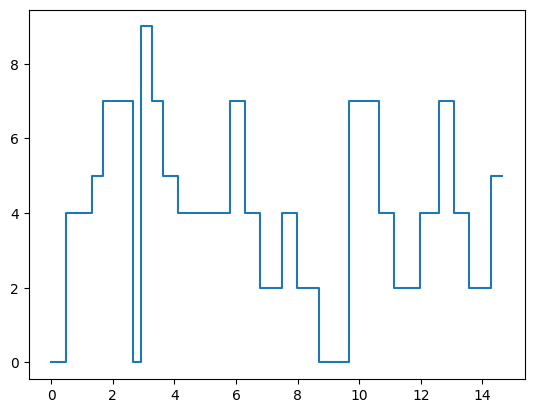

In [ ]:
plt.plot(x[0,:,0], x[0,:,1])

In [ ]:
a = torch.zeros(2,4)
b = torch.ones(2,4)
torch.stack((a,b), dim=2).view(2,8)

tensor([[0., 1., 0., 1., 0., 1., 0., 1.],
        [0., 1., 0., 1., 0., 1., 0., 1.]])

In [ ]:
a = torch.arange(12).reshape(3,4)
b = torch.arange(12,24).reshape(3,4)
torch.stack((a,b), dim=2).view(3,8)

tensor([[ 0, 12,  1, 13,  2, 14,  3, 15],
        [ 4, 16,  5, 17,  6, 18,  7, 19],
        [ 8, 20,  9, 21, 10, 22, 11, 23]])

In [ ]:
def batch_rectilinear_with_gap_transform(data: torch.Tensor):
    '''
    Transform data to rectilinear format
    Data is of shape (batch_size, seq_len, 3) where the last dimension is (gap, duration, note) format
    '''
    assert data.ndim == 3, 'data must be of shape (batch_size, seq_len, 3)'
    assert data.shape[2] == 3, 'data must be of shape (batch_size, seq_len, 3)'
    batch_size = data.shape[0]
    seq_len = data.shape[1]
    gap_cumsum = data[:,:,0].cumsum(dim=1) # shape (batch_size, seq_len)
    dur_cumsum = data[:,:,1].cumsum(dim=1) # shape (batch_size, seq_len)
    starts = torch.zeros_like(dur_cumsum) # shape (batch_size, seq_len)
    starts[:,1:] += dur_cumsum[:,:-1]
    starts += gap_cumsum
    ends = dur_cumsum + gap_cumsum
    t = torch.stack([starts, ends], dim=2).view(batch_size, seq_len*2).unsqueeze(-1) # shape (batch_size, seq_len*2, 1)
    pitch = data[:,:,-1:].cumsum(dim=1) # shape (batch_size, seq_len, 1
    tensor = torch.cat([t, torch.repeat_interleave(pitch, 2, dim=1)], dim=-1)
    return tensor

In [ ]:
temp_df = dfs[0].copy()
temp_df['Pitch'] -= 60
temp_df[:30]

,Start,End,Pitch,Velocity,Instrument
0,0.000000,0.483871,0,80,melody
1,0.483871,0.967742,4,80,melody
2,0.967742,1.330645,4,80,melody
3,1.330645,1.693549,5,80,melody
4,1.693549,2.661291,7,80,melody
5,2.661291,2.903226,0,80,melody
6,2.903226,3.266129,9,80,melody
7,3.266129,3.629033,7,80,melody
8,3.629033,4.112903,5,80,melody
9,4.112903,5.806452,4,80,melody


In [ ]:
transformed = batch_rectilinear_with_gap_transform(x)
transformed[0]

tensor([[ 0.0000,  0.0000],
        [ 0.4839,  0.0000],
        [ 0.4839,  4.0000],
        [ 0.9677,  4.0000],
        [ 0.9677,  4.0000],
        [ 1.3306,  4.0000],
        [ 1.3306,  5.0000],
        [ 1.6935,  5.0000],
        [ 1.6935,  7.0000],
        [ 2.6613,  7.0000],
        [ 2.6613,  0.0000],
        [ 2.9032,  0.0000],
        [ 2.9032,  9.0000],
        [ 3.2661,  9.0000],
        [ 3.2661,  7.0000],
        [ 3.6290,  7.0000],
        [ 3.6290,  5.0000],
        [ 4.1129,  5.0000],
        [ 4.1129,  4.0000],
        [ 5.8065,  4.0000],
        [ 5.8065,  7.0000],
        [ 6.2903,  7.0000],
        [ 6.2903,  4.0000],
        [ 6.7742,  4.0000],
        [ 6.7742,  2.0000],
        [ 7.0161,  2.0000],
        [ 7.0161,  2.0000],
        [ 7.1371,  2.0000],
        [ 7.1371,  2.0000],
        [ 7.5000,  2.0000],
        [ 7.5000,  4.0000],
        [ 7.9839,  4.0000],
        [ 7.9839,  2.0000],
        [ 8.7097,  2.0000],
        [ 8.7097,  0.0000],
        [ 9.6774,  0

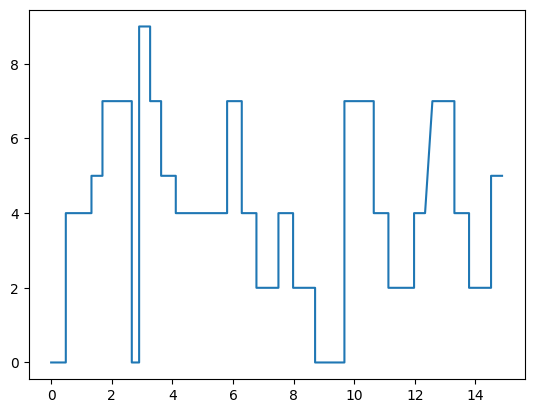

In [ ]:
plt.plot(transformed[0,:,0], transformed[0,:,1])